In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

In [57]:
def plot_results(result_dict):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_xlabel("Noise Level")
    ax.set_ylabel("Performance")
    dataset = result_dict["dataset"]
    ax.set_title(dataset)
    strucs = result_dict["structure"]
    feats = result_dict["feature"]
    ts = list(strucs.keys())

    # Ensure the x-axis values are numeric and sorted
    ts = sorted([float(t) for t in ts])  # Convert keys to floats and sort them

    struc_means = [np.mean([float(val) for val in strucs[str(t)]]) for t in ts]
    struc_devs = [np.std([float(val) for val in strucs[str(t)]]) for t in ts]
    feat_means = [np.mean([float(val) for val in feats[str(t)]]) for t in ts]
    feat_devs = [np.std([float(val) for val in feats[str(t)]]) for t in ts]

    ax.errorbar(ts, struc_means, yerr=struc_devs, label="Structure", c = "black")
    ax.errorbar(ts, feat_means, yerr=feat_devs, label="Feature", c = "blue", linestyle = "dashed")

    ax.plot(ts, np.array(feat_means) / np.array(struc_means))

    # Format x-axis ticks
    ax.set_xticks(ts)  # Ensure all unique noise levels are shown
    ax.set_xticklabels([f"{t:.2f}" for t in ts])  # Format as two decimal places

    ax.legend()
    plt.show()


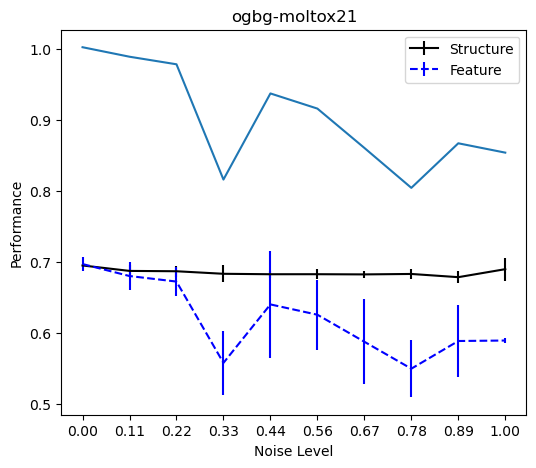

In [58]:
results_jsons = os.listdir("results")
result_dicts = []
for result in results_jsons:
    with open(f"results/{result}", "r") as f:
        dic = json.load(f)
    result_dicts.append(dic)
plot_results(result_dicts[0])


In [43]:
from scipy.stats import spearmanr

def nncr(result_dict):
    dataset = result_dict["dataset"]
    strucs = result_dict["structure"]
    feats = result_dict["feature"]
    ts = list(strucs.keys())
    struc_means = [np.mean([float(val) for val in strucs[str(t)]]) for t in ts]
    struc_devs = [np.std([float(val) for val in strucs[str(t)]]) for t in ts]
    feat_means = [np.mean([float(val) for val in feats[str(t)]]) for t in ts]
    feat_devs = [np.std([float(val) for val in feats[str(t)]]) for t in ts]

    r_structure = np.abs(spearmanr(ts, struc_means)[0])
    r_feature = np.abs(spearmanr(ts, feat_means)[0])

    nncr = r_feature  / r_structure

    print(f"r feature: {r_feature}\n r structure: {r_structure} nncr: {nncr}")

    return nncr

nncr(result_dicts[0])

r feature: 0.6848484848484848
 r structure: 0.4787878787878787 nncr: 1.4303797468354431


1.4303797468354431

-0.6848484848484848


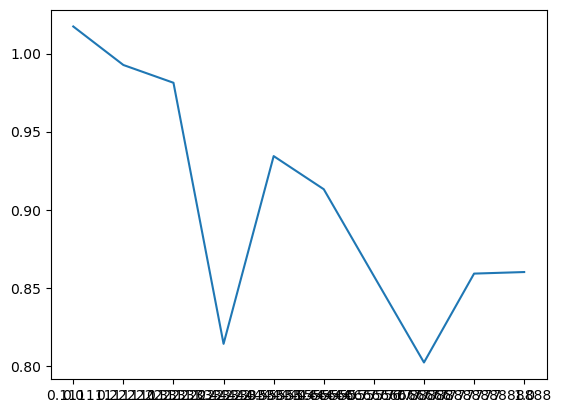

0.9032362334762698

In [ ]:
def nnd(result_dict):
    dataset = result_dict["dataset"]
    strucs = result_dict["structure"]
    feats = result_dict["feature"]
    ts = list(strucs.keys())
    struc_means = [np.mean([float(val) for val in strucs[str(t)]]) for t in ts]
    struc_devs = [np.std([float(val) for val in strucs[str(t)]]) for t in ts]
    feat_means = [np.mean([float(val) for val in feats[str(t)]]) for t in ts]
    feat_devs = [np.std([float(val) for val in feats[str(t)]]) for t in ts]

    difference = np.array(feat_means) / np.mean(struc_means)

    return np.sum(difference) / difference.shape[0]

nnd(result_dicts[0])